# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from scipy import optimize
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [31]:
# Separate the features (x) and the target variable (y)
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(x)
# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
n_estimators = 50
n_depth = 5

for i in range(5):   # 5 iterations
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=n_depth,
                                   oob_score=True)
    model.fit(X_train, y_train)

predictions = model.predict(X_test)



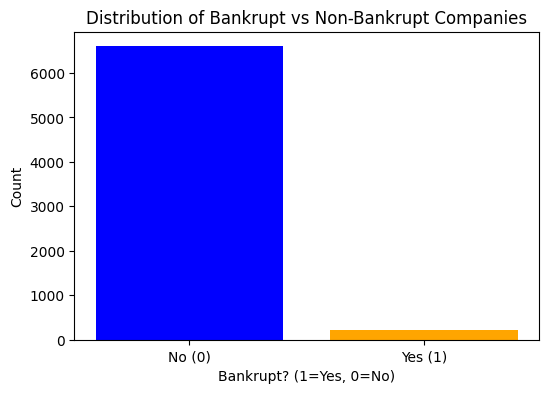

In [20]:

# Count the occurrences of each value in the 'Bankrupt?' column
target_counts = df['Bankrupt?'].value_counts()

# Create a bar chart using plt
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'orange'])
plt.title("Distribution of Bankrupt vs Non-Bankrupt Companies")
plt.xlabel("Bankrupt? (1=Yes, 0=No)")
plt.ylabel("Count")
plt.xticks([0, 1], labels=['No (0)', 'Yes (1)'])  # Custom labels for x-axis
plt.show()

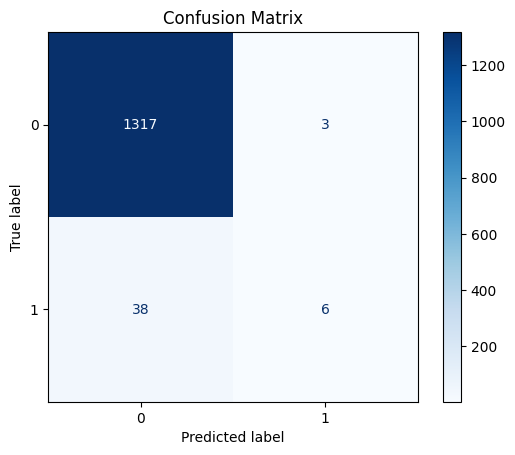

Confusion Matrix:
 [[1317    3]
 [  38    6]]


In [32]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm)

In [34]:
import numpy as np
from scipy.stats import t

# Group the predictions
group_1_indices = np.where(predictions == 1)[0]  # Predicted as bankrupt
group_2_indices = np.where(predictions == 0)[0]  # Predicted as non-bankrupt

# Select a feature (e.g., first feature, column 0)
feature_column = 0
group_1_feature = X_test[group_1_indices, feature_column]
group_2_feature = X_test[group_2_indices, feature_column]

# Calculate means, standard deviations, and group sizes
x1_mean = np.mean(group_1_feature)
x2_mean = np.mean(group_2_feature)
s1 = np.std(group_1_feature, ddof=1)
s2 = np.std(group_2_feature, ddof=1)
n1 = len(group_1_feature)
n2 = len(group_2_feature)

# Calculate t-score
t_score = (x1_mean - x2_mean) / np.sqrt((s1**2 / n1) + (s2**2 / n2))

# Degrees of freedom
df = n1 + n2 - 2

# Calculate p-value (two-tailed)
p_value = t.sf(np.abs(t_score), df) * 2

# Display results
print("Group 1 (Bankrupt): Mean =", x1_mean, ", Std Dev =", s1, ", Size =", n1)
print("Group 2 (Non-Bankrupt): Mean =", x2_mean, ", Std Dev =", s2, ", Size =", n2)
print("T-Score =", t_score)
print("P-Value =", p_value)



Group 1 (Bankrupt): Mean = -3.037973722920798 , Std Dev = 2.000525584401073 , Size = 9
Group 2 (Non-Bankrupt): Mean = 0.06880896668424306 , Std Dev = 0.9803586065951988 , Size = 1355
T-Score = -4.655238418280735
P-Value = 3.5516677894514077e-06


In [35]:
from sklearn.metrics import precision_score

# Calculate precision score
precision = precision_score(y_test, predictions)

print("Precision Score:", precision)

Precision Score: 0.6666666666666666


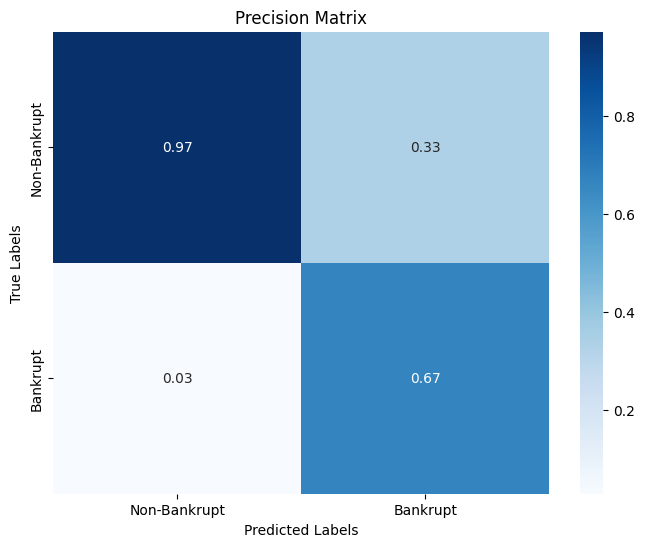

In [40]:
!pip install seaborn

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Convert confusion matrix to precision matrix
# Precision = TP / (TP + FP)
precision_matrix = cm.astype('float') / cm.sum(axis=0, keepdims=True)

# Replace NaN values (for classes without predictions) with 0
precision_matrix = np.nan_to_num(precision_matrix)

# Plot the precision matrix
plt.figure(figsize=(8, 6))
sns.heatmap(precision_matrix, annot=True, cmap="Blues", fmt=".2f", xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title("Precision Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
